In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv("data_files/UTSEUS-anjuke-real-estate-baoshan.csv")
df.head()

,id,address,longitude,latitude,bedroom,room,surface,price,onesquaremeter,tags,district,neighborhood,done
0,A888553302,宝山-大场 金地艺境(宝山)(555弄),121.343927,31.319356,2,2,30.0,1160000.0,38666.666667,金地开发 **首推 地铁首通 价格首降 配套就是你能想到的,baoshan,dachang,1
1,A888376847,宝山-大场 骏华苑,121.407325,31.302368,1,1,38.0,1950000.0,51315.789474,龙璟公馆嘉兴市近万达广场，北大附属实验校区，地铁沿线高铁站旁,baoshan,dachang,1
2,A885088482,宝山-大场 琉樽尚品(255弄),121.397487,31.290871,3,2,92.0,5350000.0,58152.173913,92+7平书房，婚房装修30万！满2年税少11万！再降20万,baoshan,dachang,1
3,A885392981,宝山-大场 琉樽尚品（255弄）,121.397487,31.290871,2,2,68.0,4350000.0,63970.588235,中环景观，电梯复式，豪装45万全送，拎包入住，小格局大设计，,baoshan,dachang,1
4,A885831305,宝山-大场 美好家小区,121.421397,31.302658,2,2,80.0,4000000.0,50000.000000,美好家南北通精装2房板式房型采光好随时好看带天井,baoshan,dachang,1


In [7]:
data = df[['latitude','longitude','bedroom','room','surface','price','onesquaremeter']]
data.head()

,latitude,longitude,bedroom,room,surface,price,onesquaremeter
0,31.319356,121.343927,2,2,30.0,1160000.0,38666.666667
1,31.302368,121.407325,1,1,38.0,1950000.0,51315.789474
2,31.290871,121.397487,3,2,92.0,5350000.0,58152.173913
3,31.290871,121.397487,2,2,68.0,4350000.0,63970.588235
4,31.302658,121.421397,2,2,80.0,4000000.0,50000.000000


In [9]:
data = data[data['price'] < 20000000]

In [29]:
X = data[['latitude','longitude','bedroom','room','surface']]
Y = data['onesquaremeter']

(array([1.000e+00, 5.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 5.000e+00,
        6.000e+00, 8.000e+00, 3.000e+00, 4.000e+01, 6.200e+01, 3.600e+01,
        2.400e+01, 1.040e+02, 1.460e+02, 1.690e+02, 2.370e+02, 2.250e+02,
        1.210e+02, 1.500e+02, 1.080e+02, 1.380e+02, 2.460e+02, 2.770e+02,
        2.370e+02, 4.150e+02, 3.150e+02, 4.590e+02, 3.370e+02, 3.280e+02,
        2.660e+02, 2.970e+02, 2.510e+02, 2.730e+02, 3.100e+02, 3.250e+02,
        3.040e+02, 4.310e+02, 4.170e+02, 5.950e+02, 6.200e+02, 8.410e+02,
        8.100e+02, 9.020e+02, 1.125e+03, 1.290e+03, 1.201e+03, 1.204e+03,
        1.462e+03, 1.223e+03, 1.287e+03, 1.208e+03, 9.400e+02, 1.390e+03,
        1.125e+03, 9.540e+02, 9.540e+02, 7.380e+02, 7.930e+02, 7.030e+02,
        6.820e+02, 4.890e+02, 5.630e+02, 5.910e+02, 4.410e+02, 4.690e+02,
        3.960e+02, 2.840e+02, 3.490e+02, 2.300e+02, 2.470e+02, 2.300e+02,
        2.050e+02, 1.720e+02, 7.300e+01, 9.400e+01, 8.600e+01, 7.900e+01,
        3.500e+01, 6.300e+01, 7.100e+0

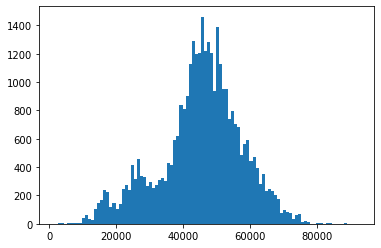

In [30]:
plt.hist(Y,100)

In [31]:
Z = pd.DataFrame.copy(Y)
Z[Y <= 46000] = 'Cheap'
Z[Y > 46000] = 'Expensive'

In [222]:
Z.head()

0            Medium
1         Expensive
2         Expensive
3    Very expensive
4         Expensive
Name: onesquaremeter, dtype: object

In [223]:
X.head()

,latitude,longitude,bedroom,room,surface
0,31.319356,121.343927,2,2,30.0
1,31.302368,121.407325,1,1,38.0
2,31.290871,121.397487,3,2,92.0
3,31.290871,121.397487,2,2,68.0
4,31.302658,121.421397,2,2,80.0


In [69]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Z)

In [70]:
X_train, Z_train = X[0:20000], Z[0:20000]
X_val, Z_val = X[20000:len(X)], Z[20000:len(Z)]

In [71]:
clf = clf.fit(X_train, Z_train)

In [72]:
Z_pred = clf.predict(X_val)

In [73]:
np.mean(Z_pred == Z_val)

0.6475130434782609

In [ ]:
#----------------

In [85]:
from sklearn.model_selection import cross_val_score
clf = tree.DecisionTreeClassifier(max_depth=50)
scores = cross_val_score(clf, X, Z, cv=5)
np.mean(scores)

0.5344897864120598

[Text(167.4, 190.26, 'X[0] <= 31.348\nentropy = 0.5\nsamples = 34375\nvalue = [16746, 17629]'),
 Text(83.7, 135.9, 'X[4] <= 77.5\nentropy = 0.322\nsamples = 16380\nvalue = [3305, 13075]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 121.364\nentropy = 0.405\nsamples = 8640\nvalue = [2438, 6202]'),
 Text(20.925, 27.180000000000007, 'entropy = 0.37\nsamples = 318\nvalue = [240, 78]'),
 Text(62.775000000000006, 27.180000000000007, 'entropy = 0.389\nsamples = 8322\nvalue = [2198, 6124]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 121.389\nentropy = 0.199\nsamples = 7740\nvalue = [867, 6873]'),
 Text(104.625, 27.180000000000007, 'entropy = 0.439\nsamples = 832\nvalue = [271, 561]'),
 Text(146.475, 27.180000000000007, 'entropy = 0.158\nsamples = 6908\nvalue = [596, 6312]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 31.405\nentropy = 0.378\nsamples = 17995\nvalue = [13441, 4554]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 121.363\nentropy = 0.445\nsamples = 12950\nvalue = [8623, 432

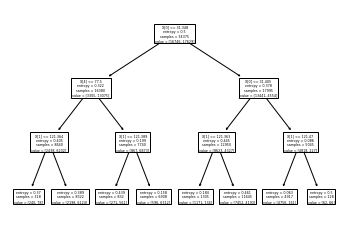

In [90]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X,Z)
tree.plot_tree(clf)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = 

In [209]:
from sklearn.model_selection import ShuffleSplit

In [210]:
X = data[['latitude','longitude','bedroom','room','surface']]
Y = data['onesquaremeter']

In [211]:
Z = pd.DataFrame.copy(Y)
Z[Y <= 20000] = 'Cheap'
Z[(Y > 20000) & (Y <= 40000)] = 'Medium'
Z[(Y > 40000) & (Y <= 60000)] = 'Expensive'
Z[Y > 60000] = 'Very expensive'

In [212]:
X_train, y_train = X[0:20000], Z[0:20000]
X_test, y_test = X[20000:len(X)], Z[20000:len(Z)]

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.30)

In [218]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [219]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=50)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.7276905177428737

In [220]:
clf.fit(X_train, Z_train)
Z_pred = clf.predict(X_test)

In [221]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Z_test, Z_pred))
print(classification_report(Z_test, Z_pred))

[[ 133  108  162    0]
 [  10 5876  287  286]
 [  43  770 1580   10]
 [   0  452   11  585]]
                precision    recall  f1-score   support

         Cheap       0.72      0.33      0.45       403
     Expensive       0.82      0.91      0.86      6459
        Medium       0.77      0.66      0.71      2403
Very expensive       0.66      0.56      0.61      1048

      accuracy                           0.79     10313
     macro avg       0.74      0.61      0.66     10313
  weighted avg       0.79      0.79      0.78     10313

